In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

import random
import numpy as np

In [2]:
centroids = [(-5, -5), (5, 5)]
cluster_std = [1, 1]

In [4]:
X, y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centroids, n_features=2, random_state=2)

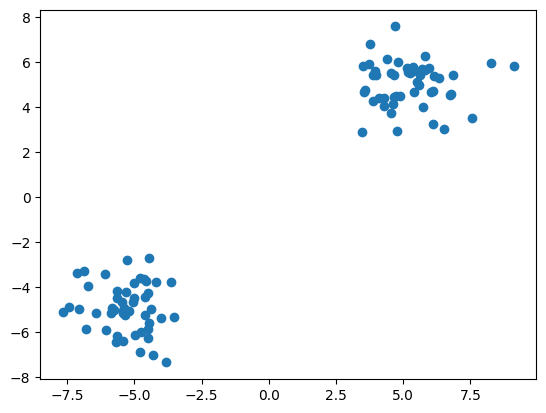

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [13]:


class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]

        for _ in range(self.max_iter):
            cluster_group = self.assign_cluster(X)
            old_centroid = self.centroids
            self.centroids = self.move_centroids(X, cluster_group)

            if np.allclose(old_centroid, self.centroids):
                break

        return cluster_group

    def assign_cluster(self, X):
        cluster_group = []

        for row in X:
            distances = [np.sqrt(np.dot(row - c, row - c)) for c in self.centroids]
            cluster_group.append(np.argmin(distances))

        return np.array(cluster_group)

    def move_centroids(self, X, cluster_group):
        new_centroids = []
        for t in range(self.n_clusters):
            points = X[cluster_group == t]
            new_centroids.append(points.mean(axis=0))
        return np.array(new_centroids)


In [15]:
km = KMeans(n_clusters = 2, max_iter = 100)

In [16]:
y_means = km.fit_predict(X)

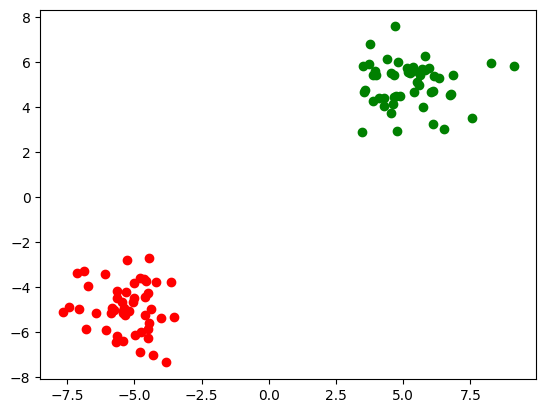

In [17]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], color = 'red')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], color = 'green')
plt.show()